In [1]:
! pip install pyspark

     |████████████████████████████████| 212.4 MB 3.1 MB/s eta 0:00:011
     |████████████████████████████████| 198 kB 2.3 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=2cc4ebd95615484108d6840faa2cd74d7b9fef6ade24a3591fc276419458303b
  Stored in directory: /tmp/pip-ephem-wheel-cache-uvbczw9e/wheels/df/88/9e/58ef1f74892fef590330ca0830b5b6d995ba29b44f977b3926
Successfully built pyspark


In [2]:
! pip install apache-sedona

     |████████████████████████████████| 67 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 209.1 MB 513 kB/s eta 0:00:011
  Created wheel for pyspark: filename=pyspark-3.0.3-py2.py3-none-any.whl size=209435972 sha256=2a5a6330f32adaadcd07853d1e1a2a47ab1db12e924f1bffb2e33dec365fe1ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-vzyilwyg/wheels/7f/28/02/0373b4f55c817bebc0dfe467728642269180aecfc771cebd06
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.1.2
    Uninstalling pyspark-3.1.2:
      Successfully uninstalled pyspark-3.1.2


In [1]:
import os

import geopandas as gpd
from pyspark.sql import SparkSession

from sedona.register import SedonaRegistrator
from sedona.utils import SedonaKryoRegistrator, KryoSerializer

In [2]:
from sqlalchemy import create_engine

# set up database
user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

db_connection_url = f"postgresql://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(db_connection_url)

In [ ]:
# uprn = gpd.read_postgis('SELECT * FROM openuprn', engine, geom_col='geometry')

In [3]:
def pgselect(table, buffer=100, x=338250, y=392250):
    sql = f'''
    SELECT * FROM {table} 
    WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'''
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [4]:
uprn = pgselect('openuprn')

<AxesSubplot:>

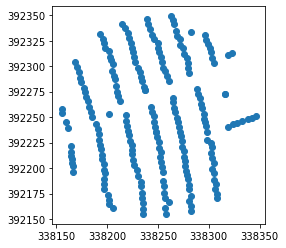

In [6]:
uprn.plot()

In [8]:
spark = SparkSession. \
    builder. \
    appName('appName'). \
    config("spark.serializer", KryoSerializer.getName). \
    config("spark.kryo.registrator", SedonaKryoRegistrator.getName). \
    config('spark.jars.packages',
           'org.apache.sedona:sedona-python-adapter-3.0_2.12:1.0.0-incubating,org.datasyslab:geotools-wrapper:geotools-24.0'). \
    getOrCreate()

Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
:: loading settings :: url = jar:file:/root/miniconda3/lib/python3.9/site-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.apache.sedona#sedona-python-adapter-3.0_2.12 added as a dependency
org.datasyslab#geotools-wrapper added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-aa202773-5b85-4c84-a383-1454e6e53f68;1.0
	confs: [default]
	found org.apache.sedona#sedona-python-adapter-3.0_2.12;1.0.0-incubating in central
	found org.locationtech.jts#jts-core;1.18.0 in central
	found org.wololo#jts2geojson;0.14.3 in central
	found com.fasterxml.jackson.core#jackson-databind;2.10.0 in central
	found com.fasterxml.jackson.core#jackson-core;2.10.0 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.10.0.pr1 in central
	found org.apache.sedona#sedona-core-3.0_2.12;1.0.0-incubating in central
	found org.apache.sedona#

In [9]:
SedonaRegistrator.registerAll(spark)

True

In [10]:
uprn_spark = spark.createDataFrame(uprn)

In [12]:
uprn_spark.show()

+--------+------------+------------+----------+----------+--------------------+
|    UPRN|X_COORDINATE|Y_COORDINATE|  LATITUDE| LONGITUDE|            geometry|
+--------+------------+------------+----------+----------+--------------------+
|38020450|    338319.0|    392311.0|53.4239859|-2.9296659|POINT (338319 392...|
|38020451|    338323.0|    392313.0|53.4240044|-2.9296061|POINT (338323 392...|
|38076841|    338193.0|    392332.0|53.4241599|-2.9315658|POINT (338193 392...|
|38076843|    338196.0|    392327.0|53.4241153|-2.9315197|POINT (338196 392...|
|38076845|    338197.0|    392323.0|53.4240795|-2.9315039|POINT (338197 392...|
|38076847|    338198.0|    392318.0|53.4240347|-2.9314878|POINT (338198 392...|
|38076849|    338202.0|    392315.0|53.4240082|-2.9314271|POINT (338202 392...|
|38076850|    338169.0|    392304.0|53.4239054|-2.9319214|POINT (338169 392...|
|38076851|    338203.0|    392309.0|53.4239544|-2.9314108|POINT (338203 392...|
|38076852|    338171.0|    392299.0|53.4

In [13]:
from sedona.core.spatialOperator import KNNQuery

In [14]:
uprn

,UPRN,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,geometry
0,38020450,338319.00,392311.00,53.423986,-2.929666,POINT (338319.000 392311.000)
1,38020451,338323.00,392313.00,53.424004,-2.929606,POINT (338323.000 392313.000)
2,38076841,338193.00,392332.00,53.424160,-2.931566,POINT (338193.000 392332.000)
3,38076843,338196.00,392327.00,53.424115,-2.931520,POINT (338196.000 392327.000)
4,38076845,338197.00,392323.00,53.424079,-2.931504,POINT (338197.000 392323.000)
...,...,...,...,...,...,...
203,38258528,338202.00,392253.00,53.423451,-2.931415,POINT (338202.000 392253.000)
204,38332710,338316.00,392273.00,53.423644,-2.929704,POINT (338316.000 392273.000)
205,38339410,338200.88,392173.54,53.422737,-2.931416,POINT (338200.880 392173.540)
206,38339411,338202.01,392164.78,53.422658,-2.931397,POINT (338202.010 392164.780)


In [16]:
roads = pgselect('openroads')

In [20]:
roads_spark = spark.createDataFrame(roads[['id','geometry']])

In [31]:
uprn_spark.approximateTotalCount

AttributeError: 'DataFrame' object has no attribute 'approximateTotalCount'

In [34]:
all_uprn = spark.createDataFrame(gpd.read_postgis('SELECT * FROM openuprn', 
                                                  engine, 
                                                  geom_col='geometry')[['UPRN','geometry']])

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.readRDDFromFile.
: java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.api.java.JavaRDD$.readRDDFromInputStream(JavaRDD.scala:237)
	at org.apache.spark.api.java.JavaRDD$.readRDDFromFile(JavaRDD.scala:224)
	at org.apache.spark.api.python.PythonRDD$.readRDDFromFile(PythonRDD.scala:262)
	at org.apache.spark.api.python.PythonRDD.readRDDFromFile(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
all_uprn

In [ ]:
x